

---

# QUESTION 1


---




GOAL:

---
Implement a Linear Regression model to fit a line which would help model labels for x.

Approach:
0. We start off the training by computing the value for h(x) using our randomly initialized weights.
\
\begin{equation}
  h(x) = \sum_{i=0}^{m}θ_i x_i = θ^Tx
\end{equation}

1. Compute the loss function using:
\
\begin{equation}
  J(θ) = \frac{1}{2}\sum_{i=1}^{m}(hθ(x^{(i)}) - y{(i)})^2
\end{equation}

2. Peform gradient descent to minimize the loss function. This is done until convergence i.e our loss function becomes equal to or almost zero. Or we exhaust our training data.
\
\begin{equation}
  θ_j := θ_j - α \frac{∂}{∂ θ_j}J(θ)
\end{equation}

\begin{equation}
  θ_j := θ_j - α \frac{∂}{∂ θ_j}J(θ)
\end{equation}

3. Finally, we use the weights to predict our label, y.
\
\begin{equation}
  h(x) = \sum_{i=0}^{n}θ_i x_i = θ^Tx
\end{equation}

Steps 0 - 2 are computed iteratively.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
path = "/content/drive/MyDrive/"

In [18]:
X_train = np.load(path + "x_train.npy", encoding='bytes')
y_train = np.load(path + "y_train.npy", encoding='bytes')

X_test = np.load(path + "x_test.npy", encoding='bytes')
y_test = np.load(path + "y_test.npy", encoding='bytes')

In [19]:
print(X_train.shape)
print(y_train.shape)

(100, 1)
(100,)


In [20]:
train_data = {
    'x': X_train.flatten(),
    'y': y_train.flatten(),
}

df_train = pd.DataFrame(train_data)
df_train.head()

,x,y
0,-1.283572,6.598155
1,-0.382959,2.611481
2,-0.630463,1.600551
3,1.859296,-4.607531
4,-1.506802,10.533453


In [21]:
test_data = {
    'x': X_test.flatten(),
    'y': y_test.flatten(),
}

df_test = pd.DataFrame(test_data)
df_test.head()

,x,y
0,-0.976908,2.799660
1,0.820125,10.159309
2,0.125181,7.236150
3,0.782143,10.286342
4,0.602776,10.355240


In [22]:
print(len(X_train))
print(len(X_test))

100
100


The Linear Regression Model Using Gradient Descent Approach

---



In [23]:
class MyLinearRegression:
  def __init__(self, lr = 0.001, n_iterations = 1000):
    self.w = None
    self.losses = []
    self.lr = lr
    self.n_iterations = n_iterations
    
  def fit(self, X, y):
    # X.shape = m x n
    # y = m x 1
    # w.shape = n x 1

    # Initialize the weights with random values
    self.w = np.zeros((X.shape[1], 1))
    m = X.shape[0]

    y = np.reshape(y.flatten(), (y.shape[0], 1))
    
    for _ in range(self.n_iterations):
      h = np.dot(X, self.w)
      error = h - y

      self.w -= (self.lr / m) * np.dot(X.T, error)

      loss = np.sum(error ** 2) / 2*m
      self.losses.append(loss)

  def predict(self, x_test):
    return np.dot(x_test, self.w)

  def rmse(self, y_actual, y_pred):
    # This computes the root mean squared error

    error = (1/len(y_actual)) * np.sum((y_actual - y_pred) ** 2)
    return np.sqrt(error)

  def alse(self, y_actual, y_pred):
    # This computes the average least squares error

    error = (1/2) * np.sum((y_pred - y_actual) ** 2)
    return error / len(y_actual)



---
**Question 1.1**


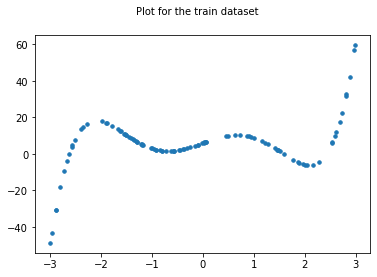

In [24]:
# Plot for the train dataset
plt.scatter(X_train, y_train, s=12)
plt.suptitle("Plot for the train dataset", fontsize=10)
plt.show()

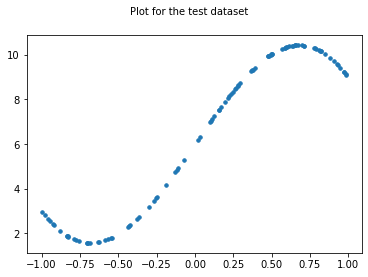

In [25]:
# Plot for the test dataset
plt.scatter(X_test, y_test, s=12)
plt.suptitle("Plot for the test dataset", fontsize=10)
plt.show()

In [26]:
model = MyLinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

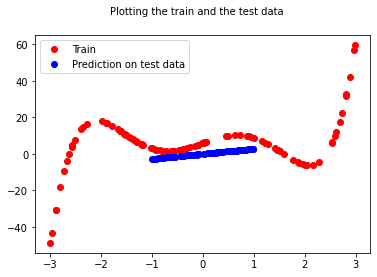

In [27]:
# Visualising the relationship between training data and prediction.    

plt.plot(X_train, y_train, 'ro', label="Train")
plt.plot(X_test, y_pred, 'bo', label="Prediction on test data")
plt.suptitle("Plotting the train and the test data", fontsize=10)
plt.legend(loc="upper left")
plt.show()

In [28]:
print(f'The prediction error is: {model.rmse(y_test, y_pred)}')

The prediction error is: 6.72137853955021




---


**Question 1.2a**

The relationship is not linear

  

**Question 1.2b**

i). Yes, we do. We can engineer the features by applying the Basis function to create features that are deterministic of the original ones.

ii). We can try 2nd to 4th degree polynomials i.e 2nd to 4th order basis functions.

In [29]:
# This is used to visualize the effect if the basis functions

def fit_model_to_data(x_train_modified, title):
  model = MyLinearRegression()
  model.fit(x_train_modified, y_train)

  y_train_modified = model.predict(x_train_modified)

  error = model.alse(y_train, y_train_modified)

  error = round(error, 2)

  # Visualising the relationship between training data and prediction.    

  plt.plot(X_train, y_train, 'ro', label="Actual")
  plt.plot(X_train, y_train_modified, 'bo', label="Predicted")
  plt.suptitle(title + ". The prediction error (Average Least Square Error) is: " + str(error), fontsize=10)
  plt.legend(loc="upper left")
  plt.show()

---
We can use our model to plot and visualize the result


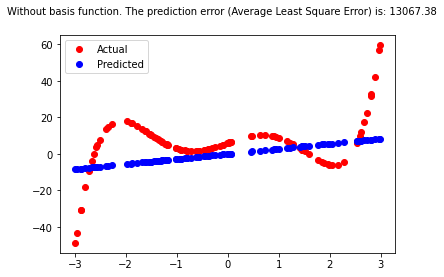

In [30]:
fit_model_to_data(X_train, 'Without basis function')



---

Computing the Quadratic Basis Function

In [31]:
# Adding a 2nd degree basis function to the features
X_train_quad = np.concatenate([X_train, np.power(X_train, 2)], axis=1)

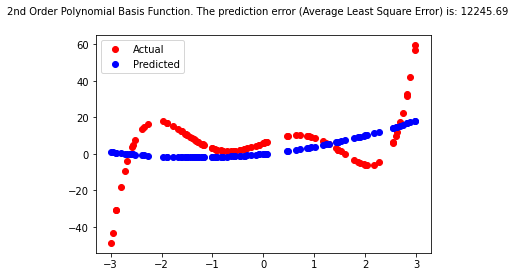

In [32]:
fit_model_to_data(X_train_quad, '2nd Order Polynomial Basis Function')



---

Computing the Cubic Basis Function

In [33]:
# Adding a 3rd degree basis function to the features
X_train_cube = np.concatenate([X_train, np.power(X_train, 2), np.power(X_train, 3)], axis=1)

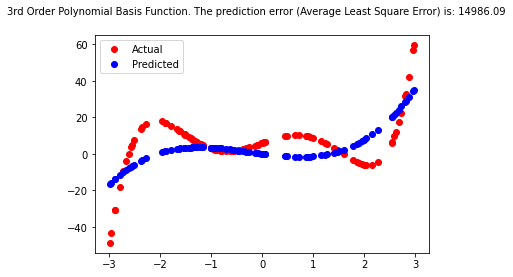

In [34]:
fit_model_to_data(X_train_cube, '3rd Order Polynomial Basis Function')



---

Computing the 4th Order Basis Function

In [35]:
# Adding a 4th degree basis function to the features
X_train_4th = np.concatenate([X_train, np.power(X_train, 2), np.power(X_train, 3), np.power(X_train, 4)], axis=1)

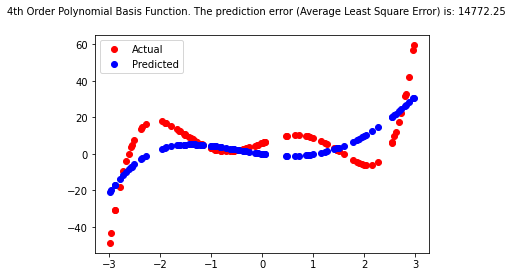

In [36]:
fit_model_to_data(X_train_4th, '4th Order Polynomial Basis Function')



---

From the plots of the basis functions above we could see that the higher the order of the basis function added, the more it tries to fit the no-linearity of the data. This clearly shows that to model the non-liearity of the dataset, more features need to be created.


---

# QUESTION 2

---



In [37]:
data = pd.read_csv(path + 'Assignment1_Q2_Data.csv')
data.drop(['House ID'], inplace=True, axis=1) 

data.head()

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
1,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
2,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
3,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
4,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


In [38]:
# Separating the features and the label
X = data.iloc[:, 0:-1]

y = data.iloc[:, -1]

In [39]:
X.head()

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places
0,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0
1,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0
2,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0
3,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0
4,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0


In [40]:
y = y.values

In [41]:
model = MyLinearRegression()
model.fit(X, y)



---


2a. Calculate the average least square error

---


In [42]:
y_pred = model.predict(X)
alse = model.alse(y, y_pred)
print(f'The average least square error is: {alse}')

The average least square error is: 4985.89536197685



---


**Question 2b and 2c**

---



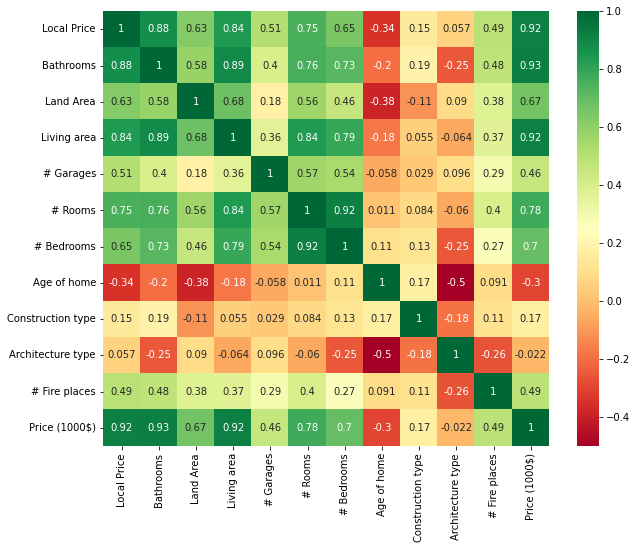

In [43]:
import seaborn as sns

correlation_mat = data.corr()
top_correlated_features = correlation_mat.index
plt.figure(figsize=(10, 8))
sns.heatmap(data[top_correlated_features].corr(), cmap="RdYlGn", annot=True)




---


Using the above plot we can get a sense of the correlations of the different features to both the target (Price) and to each other. However, this does not give us an accurate information as to which feature contributes most or least to the final value (target) of the model.

Hence, we can use the weight of the features to get a sense of their importance to the model.

In [44]:
def get_features_importance():
  model = MyLinearRegression()
  model.fit(X, y)

  weights = model.w
  abs_weights = np.abs(weights)

  features = X.columns

  weights_to_features = {}
  features_to_weights = {}
  for i in range(len(features)):
    weights_to_features[abs_weights[i][0]] = features[i]
    features_to_weights[features[i]] = weights[i][0]

  most, least = np.max(abs_weights), np.min(abs_weights)

  most_feature = weights_to_features[most]
  least_feature = weights_to_features[least]
  
  return [(most_feature, features_to_weights[most_feature]), (least_feature, features_to_weights[least_feature])]

In [45]:
most_and_least_list = get_features_importance()

In [46]:
def predict_price(model, feature):
  X_new = X[feature].values
  X_new = np.reshape(X_new.flatten(), (X_new.shape[0], 1))

  model.fit(X_new, y)
  return model.predict(X_new)



---


2b. Which feature has the most effect on the final value? How do you know this? And can you use only it to predict the price?



---



In [47]:
most = most_and_least_list[0]
print(f"'{most[0]}' has the most effect on the final value since it has the largest weight ({most[1]}).")

'Local Price' has the most effect on the final value since it has the largest weight (3.030669816790062).




---


Yes, only the feature can be used to predict the price.

In [48]:
model = MyLinearRegression()
y_pred = predict_price(model, most[0])
print(y_pred)

[[25.39189683]
 [25.92476729]
 [23.45714334]
 [23.53149736]
 [26.1256264 ]
 [20.09107503]
 [30.45416616]
 [28.93558863]
 [84.78526605]
 [74.66279278]
 [30.09375572]
 [27.3679581 ]
 [32.38117444]
 [30.77017073]
 [26.07554071]
 [28.93558863]
 [42.58006711]
 [34.57926506]
 [40.19299335]
 [46.66953805]
 [30.92610763]
 [38.94394914]
 [45.41326497]
 [31.46155982]
 [43.17025212]
 [42.03067354]
 [47.2024085 ]
 [61.96168089]]


2c. Which feature has the least effect on the final value? How do you know this? And can you use only it to predict the price?

---



In [49]:
least = most_and_least_list[1]
print(f"'{least[0]}' has the least effect on the final value since it has the least weight ({least[1]}).")

'Age of home' has the least effect on the final value since it has the least weight (-0.06831179537562053).




---


Yes, only the feature with the least effect can be used to predict the price, however the model produces a very low prediction accuracy.

In [50]:
model = MyLinearRegression()

X_new = X.drop([least[0]], axis=1)

model.fit(X_new, y)

y_pred = model.predict(X_new)
new_alse = model.alse(y, y_pred)
print(f'The original average least square error (ALSE) is: {alse}, while the new ALSE after removing the feature is: {new_alse}')

The original average least square error (ALSE) is: 4985.89536197685, while the new ALSE after removing the feature is: 4906.468548408881


**As can be seen from the result above, the result improved after removing the least important feature**

. 


---


# QUESTION 3

---


To implement a locally weighted linear regression, we need to use the normal equations and not gradient descent for learning the parameters of the model.

\
\begin{equation}
  Θ = (X^TX)^{-1}X^Ty
\end{equation}

In [51]:
# Compute the weight of the query value

def get_point_weights(X, test_val, tau):
  m = X.shape[0]
  w = np.zeros((m, 1))

  for i in range(m):
    multiplier = -1/(2 * tau ** 2)
    w[i] = np.exp(multiplier * (X[i, :] - test_val) ** 2)

  return w

To make predictions, we need to use the equation below to compute the weights.

\
\begin{equation}
  Θ = (X^TWX)^{-1}X^TWY
\end{equation}

In [52]:
# Compute the value of theta for the query value

def compute_theta(X, y, test_val):
  W = get_point_weights(X, test_val, 0.5)
  W = W.ravel()
  W = np.diag(W)

  y = np.reshape(y.flatten(), (y.shape[0], 1))

  part1 = np.linalg.pinv(np.dot(np.dot(X.T, W), X))
  part2 = np.dot(np.dot(X.T, W), y)

  theta = np.dot(part1, part2)

  return theta

In [53]:
def make_predictions(X, y):
    thetas = []
    for i in range(X_train.shape[0]):
      theta = compute_theta(X, y, X[i, :])
      thetas.append(theta[0])

    thetas = np.array(thetas)
    thetas = np.reshape(thetas, thetas.shape)

    return thetas * X

In [54]:
y_preds = make_predictions(X_train, y_train)
print(y_preds)

[[ 7.68464692e+00]
 [ 1.43452162e+00]
 [ 2.90878993e+00]
 [ 2.52603224e+00]
 [ 9.05308612e+00]
 [ 3.68013257e+00]
 [ 6.96312071e+00]
 [ 2.10259548e+00]
 [-1.13454624e+01]
 [ 2.43377957e-01]
 [-4.22405159e+00]
 [ 4.92318775e+00]
 [-1.54650252e+01]
 [ 1.87870079e+01]
 [ 1.37276333e+00]
 [ 2.51651120e+01]
 [ 1.39674385e+00]
 [ 2.93268217e+01]
 [ 1.29704129e+00]
 [ 2.53175569e+00]
 [ 8.22863807e-02]
 [ 5.14530552e+00]
 [ 1.82803959e+00]
 [ 5.55458324e+00]
 [ 5.03937658e+00]
 [ 9.05133257e+00]
 [ 7.91444388e+00]
 [ 4.28031004e+00]
 [ 2.27739266e+01]
 [-1.03597691e+00]
 [ 7.28506732e+00]
 [ 6.78072767e+00]
 [ 3.77168544e+00]
 [ 2.69824329e-02]
 [ 6.93941347e+00]
 [ 8.73328491e+00]
 [ 7.73669878e+00]
 [ 2.33368722e+00]
 [ 9.16734680e+00]
 [ 3.46059392e+00]
 [ 9.37824799e+00]
 [ 4.05674965e+00]
 [ 1.74155397e+01]
 [ 1.95696919e+01]
 [ 2.65269822e+00]
 [-1.35884942e+01]
 [ 8.25975198e+00]
 [-1.62126784e+01]
 [ 1.73992374e+01]
 [ 7.00373993e-02]
 [ 1.41107659e-01]
 [ 9.10303422e+00]
 [ 3.1271344

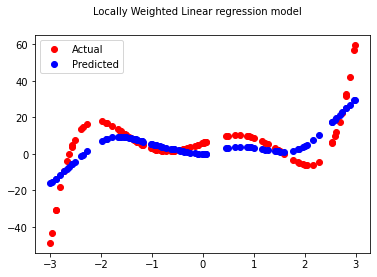

In [55]:
# Visualising the relationship between training data and prediction.    

plt.plot(X_train, y_train, 'ro', label="Actual")
plt.plot(X_train, y_preds, 'bo', label="Predicted")
plt.suptitle("Locally Weighted Linear regression model", fontsize=10)
plt.legend(loc="upper left")
plt.show()



---


3a). No basis function is required

3b). The locally weighted linear regression implementation is different from the Iterative Linear Regression in Question 1 in the following ways:


*   To make each label prediction, the weights for each point to be predicted has to be computed.
*   This leads to high computation costs, but removes the overhead of having to use basis functions to engineer a model that would fit the non-linear data.

